<a href="https://colab.research.google.com/github/dwihdyn/algo-trading/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference : https://www.oreilly.com/library/view/hands-on-algorithmic-trading/9781492082637/** 

Module 2 : Strategy Analysis

Summary :
1.   Get Stock price from alphavantage API
2.   Rename data column
3.   Convert prices from string to float
4.   Convert the index to date
5.   Visualise data in time series
6.   Create & calculate SMA10 & SMA20
7.   Sort the data with the date, ascending order
8.   Recalculate SMA10 & SMA20 due to sort data
9.   Remove any NaN values in SMA10 & SMA20
10.  Strategy evaluation using Information & Spearman correlation


## IMPORT MODULES

In [0]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

## IMPORT MSFT DATA FROM ALPHAVANTAGE

In [75]:
# pull data | RKKWDNO3XD91IUBZ -> EXXJQAB3KQ91VHOM (http://decode.org/)

response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [76]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-01-08 to 2019-08-16
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-01-08 to 2019-08-16
Data columns (total 5 columns):
1. open      100 non-null object
2. high      100 non-null object
3. low       100 non-null object
4. close     100 non-null object
5. volume    100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


## RENAME THE (BAD) NAMING COLUMN ['1. open', ...] -> ['open', ...]


In [77]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [78]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

## CONVERT PRICES FROM STRING TO FLOAT

In [79]:
stock = stock.astype(float)
type(stock['close'][1])

numpy.float64

numpy.float64

## CONVERT THE INDEX TO DATE

In [80]:
# type(stock.index) # check that its index
stock.index = pd.to_datetime(stock.index)
type(stock.index) # now check that now is date

pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

## SHOW 10 SAMPLE DATA BY RANDOM

In [81]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2019-08-19,137.855,138.550,136.8850,138.41,24370543.0
2019-10-24,139.390,140.420,138.6700,139.94,37278399.0
2019-09-06,140.030,140.180,138.2000,139.10,20824504.0
2019-10-08,137.080,137.760,135.6200,135.67,26783336.0
2019-10-17,140.950,141.420,139.0200,139.69,22102797.0
2019-12-05,150.050,150.320,149.4800,149.93,17880601.0
2020-01-02,158.780,160.730,158.3300,160.62,22634546.0
2019-09-18,137.360,138.670,136.5299,138.52,24473386.0
2019-11-12,146.280,147.570,146.0600,147.07,18648712.0
2019-09-30,138.050,139.215,137.7800,139.03,18430390.0


,open,high,low,close,volume
2019-11-06,144.37,144.52,143.200,144.06,16575798.0
2019-08-20,138.21,138.71,137.240,137.26,21188998.0
2019-10-07,137.14,138.18,137.020,137.12,16601284.0
2020-01-07,159.32,159.67,157.320,157.58,21253280.0
2019-12-10,151.29,151.89,150.765,151.13,16481060.0
2019-12-18,154.30,155.48,154.180,154.37,24132379.0
2019-11-19,150.88,151.33,150.195,150.39,23960164.0
2019-12-23,158.12,158.12,157.270,157.41,17726283.0
2019-09-11,135.91,136.27,135.090,136.12,24726117.0
2019-09-04,137.30,137.69,136.480,137.63,18015310.0


## SUMMARISE DATA

In [82]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,144.674729,145.472537,143.594435,144.636550,2.224961e+07
std,7.556988,7.571980,7.811721,7.780909,6.680803e+06
min,134.880000,135.560000,132.800000,133.390000,7.429612e+06
25%,138.170000,139.062500,136.813750,137.767500,1.786383e+07
50%,142.265000,143.395000,141.361800,142.202500,2.115534e+07
75%,151.010000,151.840000,150.213750,151.155000,2.506765e+07
max,159.450000,160.730000,158.330000,160.620000,5.359961e+07


,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,144.674729,145.472537,143.594435,144.636543,2.224962e+07
std,7.556988,7.571980,7.811721,7.780896,6.680772e+06
min,134.880000,135.560000,132.800000,133.390000,7.430973e+06
25%,138.170000,139.062500,136.813750,137.767500,1.786383e+07
50%,142.265000,143.395000,141.361800,142.202500,2.115534e+07
75%,151.010000,151.840000,150.213750,151.155000,2.506765e+07
max,159.450000,160.730000,158.330000,160.620000,5.359961e+07


## VISUALISE DATA

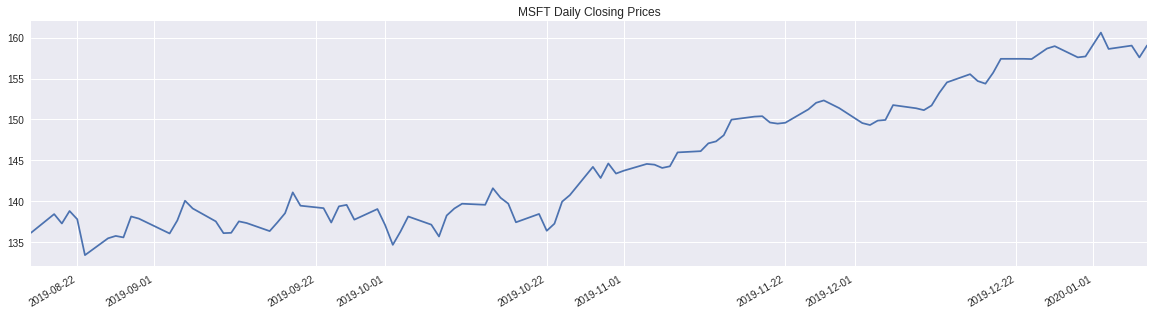

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c9746400>, None)

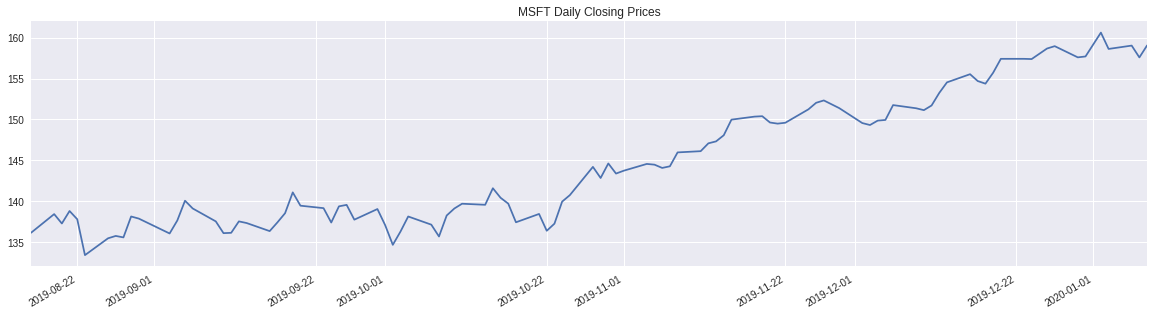

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c77eee48>, None)

In [83]:
stock['close'].plot(figsize=(20,5), title='MSFT Daily Closing Prices'),plt.show()

## EXPLORING SIGNALS : SMA CROSSOVER

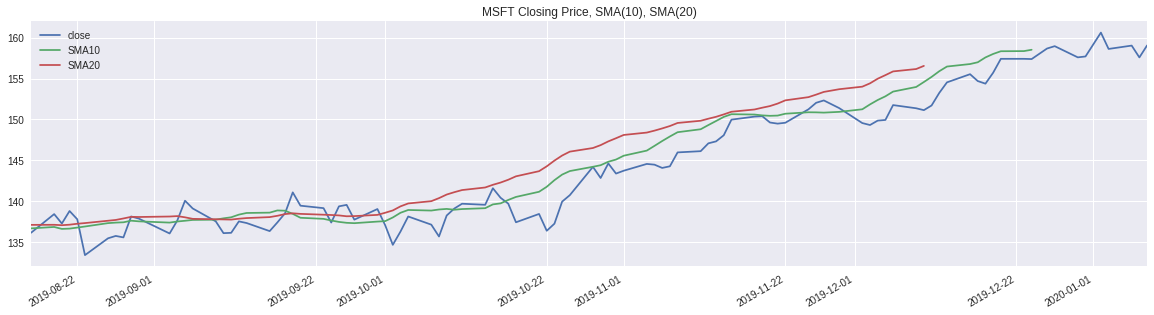

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c78fb550>, None)

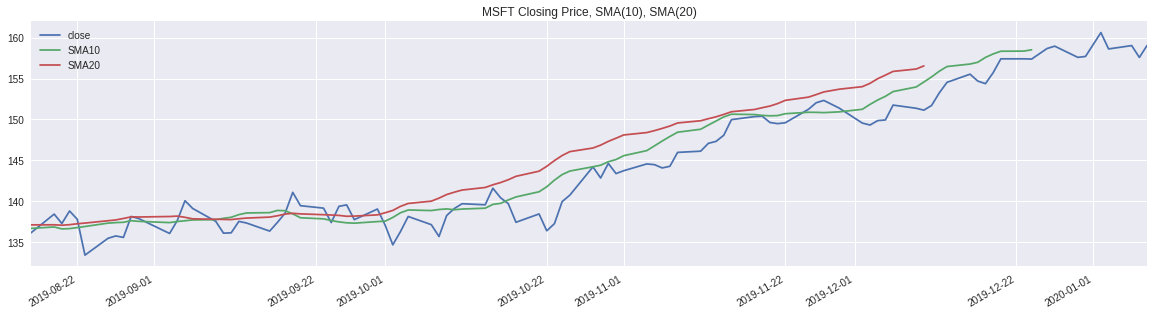

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c76fd358>, None)

In [84]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()
# stock # NaN because it takes mean of n period FORWARD, alphavantage issue on data importing

## SORT DATA BY DATE ASCENDING & PLOT RIGHT CHART

In [85]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2020-01-08,158.93,159.280,157.9491,159.05,7429612.0,NaN,NaN
2020-01-07,159.32,159.670,157.3200,157.58,21253280.0,NaN,NaN
2020-01-06,157.08,159.100,156.5100,159.03,20826702.0,NaN,NaN
2020-01-03,158.32,159.945,158.0600,158.62,21121681.0,NaN,NaN
2020-01-02,158.78,160.730,158.3300,160.62,22634546.0,NaN,NaN


,open,high,low,close,volume,SMA10,SMA20
2020-01-08,158.93,159.280,157.9491,159.0493,7430973.0,NaN,NaN
2020-01-07,159.32,159.670,157.3200,157.5800,21253280.0,NaN,NaN
2020-01-06,157.08,159.100,156.5100,159.0300,20826702.0,NaN,NaN
2020-01-03,158.32,159.945,158.0600,158.6200,21121681.0,NaN,NaN
2020-01-02,158.78,160.730,158.3300,160.6200,22634546.0,NaN,NaN


In [86]:
stock = stock.sort_index(ascending=True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-08-16,134.880,136.4600,134.720,136.13,25026151.0,136.663,137.0935
2019-08-19,137.855,138.5500,136.885,138.41,24370543.0,136.836,137.1035
2019-08-20,138.210,138.7100,137.240,137.26,21188998.0,136.599,137.0525
2019-08-21,138.550,139.4935,138.000,138.79,14982314.0,136.636,137.1155
2019-08-22,138.660,139.2000,136.290,137.78,18709662.0,136.762,137.2295


,open,high,low,close,volume,SMA10,SMA20
2019-08-16,134.880,136.4600,134.720,136.13,25026151.0,136.663,137.0935
2019-08-19,137.855,138.5500,136.885,138.41,24370543.0,136.836,137.1035
2019-08-20,138.210,138.7100,137.240,137.26,21188998.0,136.599,137.0525
2019-08-21,138.550,139.4935,138.000,138.79,14982314.0,136.636,137.1155
2019-08-22,138.660,139.2000,136.290,137.78,18709662.0,136.762,137.2295


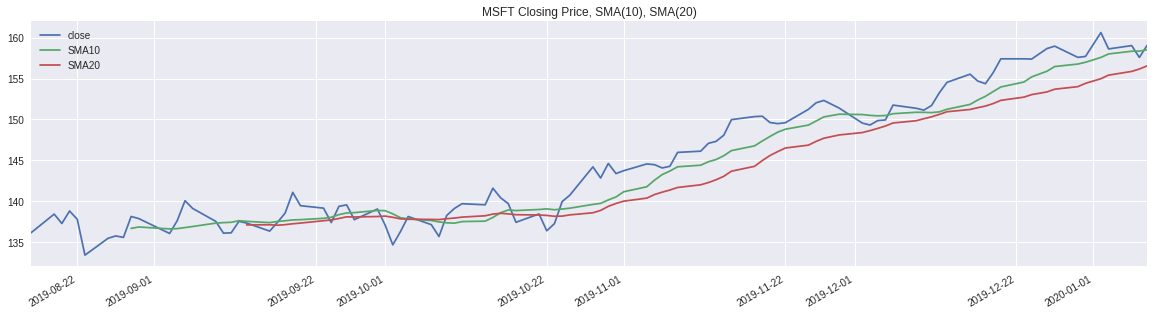

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c78ed860>, None)

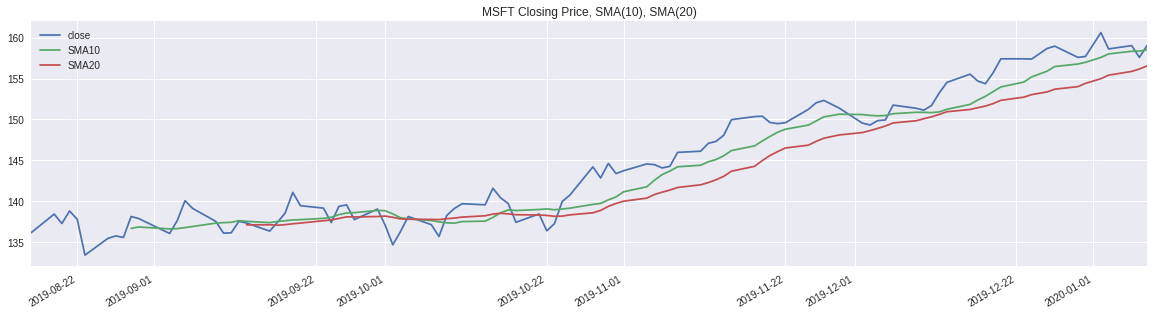

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c7765f98>, None)

In [87]:
# Need to recalculate SMA

stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()

In [88]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2019-08-16,134.880,136.4600,134.720,136.13,25026151.0,NaN,NaN
2019-08-19,137.855,138.5500,136.885,138.41,24370543.0,NaN,NaN
2019-08-20,138.210,138.7100,137.240,137.26,21188998.0,NaN,NaN
2019-08-21,138.550,139.4935,138.000,138.79,14982314.0,NaN,NaN
2019-08-22,138.660,139.2000,136.290,137.78,18709662.0,NaN,NaN


,open,high,low,close,volume,SMA10,SMA20
2019-08-16,134.880,136.4600,134.720,136.13,25026151.0,NaN,NaN
2019-08-19,137.855,138.5500,136.885,138.41,24370543.0,NaN,NaN
2019-08-20,138.210,138.7100,137.240,137.26,21188998.0,NaN,NaN
2019-08-21,138.550,139.4935,138.000,138.79,14982314.0,NaN,NaN
2019-08-22,138.660,139.2000,136.290,137.78,18709662.0,NaN,NaN


## REMOVE NaN

              open    high       low   close      volume    SMA10     SMA20
2019-09-13  137.78  138.06  136.5700  137.32  23363057.0  137.524  137.0935
2019-09-16  135.83  136.70  135.6600  136.33  16731440.0  137.371  137.1035
2019-09-17  136.96  137.52  136.4250  137.39  17976285.0  137.506  137.0525
2019-09-18  137.36  138.67  136.5299  138.52  24473386.0  137.595  137.1155
2019-09-19  140.30  142.37  140.0736  141.07  36095413.0  137.697  137.2295


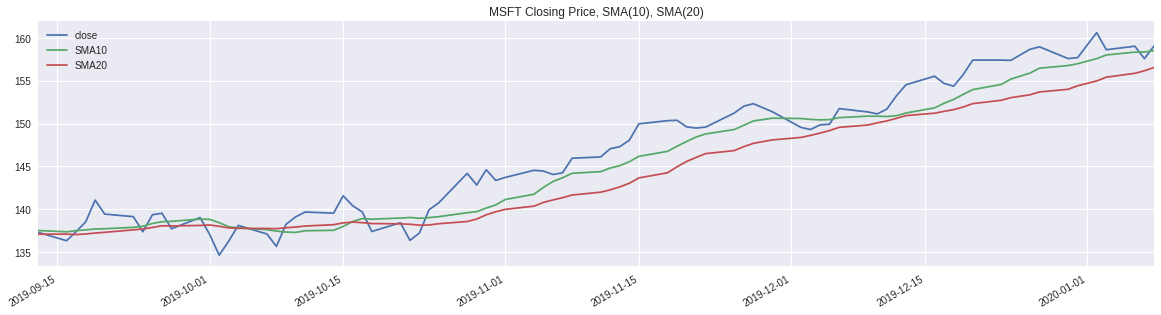

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c78ac7b8>, None)

              open    high       low   close      volume    SMA10     SMA20
2019-09-13  137.78  138.06  136.5700  137.32  23363057.0  137.524  137.0935
2019-09-16  135.83  136.70  135.6600  136.33  16731440.0  137.371  137.1035
2019-09-17  136.96  137.52  136.4250  137.39  17976285.0  137.506  137.0525
2019-09-18  137.36  138.67  136.5299  138.52  24473386.0  137.595  137.1155
2019-09-19  140.30  142.37  140.0736  141.07  36095413.0  137.697  137.2295


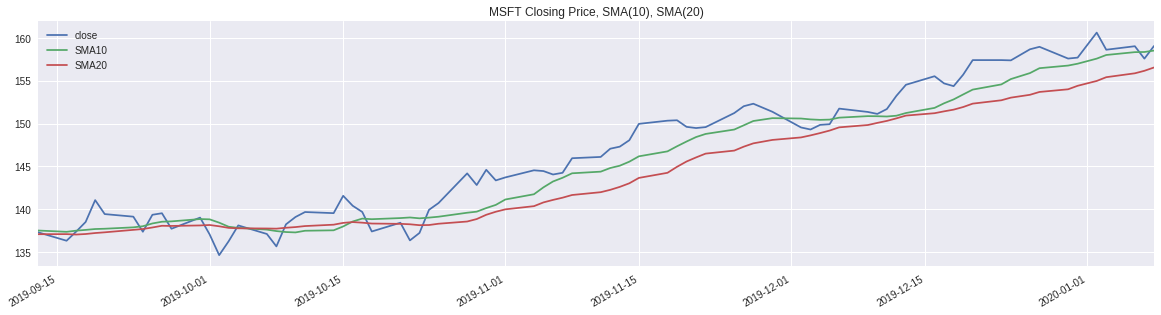

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc1c76fdb70>, None)

In [89]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close', 'SMA10','SMA20']].plot(figsize=(20,5), grid=True, title='MSFT Closing Price, SMA(10), SMA(20)'),plt.show()

## EVALUATING SIGNAL : Using Information Coefficient & Spearman Correlation

In [90]:
# get sma10 & sma20 difference value

signal = pd.DataFrame()
signal['crossover'] = stock['SMA10'] - stock['SMA20']
signal.tail()

,crossover
2020-01-02,2.6055
2020-01-03,2.5920
2020-01-06,2.4690
2020-01-07,2.1945
2020-01-08,1.9740


,crossover
2020-01-02,2.605500
2020-01-03,2.592000
2020-01-06,2.469000
2020-01-07,2.194500
2020-01-08,1.973965


In [91]:
# join the crossover table to our main table

stock = stock.join(signal, how='left')
stock.tail()

,open,high,low,close,volume,SMA10,SMA20,crossover
2020-01-02,158.78,160.730,158.3300,160.62,22634546.0,157.582,154.9765,2.6055
2020-01-03,158.32,159.945,158.0600,158.62,21121681.0,158.007,155.4150,2.5920
2020-01-06,157.08,159.100,156.5100,159.03,20826702.0,158.339,155.8700,2.4690
2020-01-07,159.32,159.670,157.3200,157.58,21253280.0,158.356,156.1615,2.1945
2020-01-08,158.93,159.280,157.9491,159.05,7429612.0,158.520,156.5460,1.9740


,open,high,low,close,volume,SMA10,SMA20,crossover
2020-01-02,158.78,160.730,158.3300,160.6200,22634546.0,157.58200,154.976500,2.605500
2020-01-03,158.32,159.945,158.0600,158.6200,21121681.0,158.00700,155.415000,2.592000
2020-01-06,157.08,159.100,156.5100,159.0300,20826702.0,158.33900,155.870000,2.469000
2020-01-07,159.32,159.670,157.3200,157.5800,21253280.0,158.35600,156.161500,2.194500
2020-01-08,158.93,159.280,157.9491,159.0493,7430973.0,158.51993,156.545965,1.973965


In [92]:
# calculate stock closing price difference from the previous 1 day

signal['close-close']=stock['close'].diff(periods=1)
signal.head()

,crossover,close-close
2019-09-13,0.4305,NaN
2019-09-16,0.2675,-0.99
2019-09-17,0.4535,1.06
2019-09-18,0.4795,1.13
2019-09-19,0.4675,2.55


,crossover,close-close
2019-09-13,0.4305,NaN
2019-09-16,0.2675,-0.99
2019-09-17,0.4535,1.06
2019-09-18,0.4795,1.13
2019-09-19,0.4675,2.55


In [93]:
# finding momentum signal. return true if signal exist, false if not 

signal.dropna(inplace=True) # inplace=True will remove the row that has NaN value entirely. False will keep the row and change the NaN value
quality = (signal['crossover'] > 0) & (signal['close-close'] > 0) | (signal['crossover'] < 0) & (signal['close-close'] < 0) # definition of signal : buy if (price increase & sma10 > sma20) . sell if (price  decrease & sma10 < sma20)
display(quality.head())

# convert quality from boolean to integer
quality = quality.astype(int)
quality.head()


2019-09-16    False
2019-09-17     True
2019-09-18     True
2019-09-19     True
2019-09-20    False
dtype: bool

2019-09-16    0
2019-09-17    1
2019-09-18    1
2019-09-19    1
2019-09-20    0
dtype: int64

2019-09-16    False
2019-09-17     True
2019-09-18     True
2019-09-19     True
2019-09-20    False
dtype: bool

2019-09-16    0
2019-09-17    1
2019-09-18    1
2019-09-19    1
2019-09-20    0
dtype: int64

In [94]:
# calculating information coefficient : https://www.investopedia.com/terms/i/information-coefficient.asp

proportion_correct = quality.sum()/quality.count()
display(proportion_correct)

information_coefficient = 2*proportion_correct - 1
information_coefficient # +1 good, -1 bad



0.5875

0.17500000000000004

0.5875

0.17500000000000004

In [95]:
# spearman correlation (why not pearson tho ?)

signal.corr(method='spearman')

,crossover,close-close
crossover,1.000000,0.004243
close-close,0.004243,1.000000


,crossover,close-close
crossover,1.000000,0.004243
close-close,0.004243,1.000000
